In [44]:
# Trump vs. Biden
# No. Data: 70,000 (35,000 each)
# Subjectivity: Trump (0.366) > Biden (0.354); People share their opinions on Biden more than Trump's.
# Polarity: Trump (0.058) < Biden (0.072); People has better perspectives on Biden than Trump's.
# Popularity: Trump (57.96) > Biden (57.01); Trump has more popularity than Biden's.
# It's ambiguous to declare who will win the election. Biden has more polarity, but Trump has more popularity

In [2]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime

%matplotlib inline

In [3]:
col = pymongo.MongoClient()["DSA201"]["Trump"]
col.count()

C:\Users\PornpatSamartlertdee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


35403

In [4]:
col.find_one()

{'_id': ObjectId('5f9f6731ce41e949b59bc986'),
 'created_at': 'Mon Nov 02 01:55:57 +0000 2020',
 'id': 1323081382789349377,
 'id_str': '1323081382789349377',
 'text': "RT @RanttMedia: Authoritarians strive to make people believe they are powerless.\n\nAs much as Trump wants us to believe this, he's the one o…",
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 35005762,
  'id_str': '35005762',
  'name': 'Dave Hunter',
  'screen_name': 'hypnocoach183',
  'location': 'Lynn, MA',
  'url': 'http://www.hypnothoughts.com/profile/DaveHunter',
  'description': 'Native of Lynn,MA now living in Lynn ,MA. again after living 23 years in upstate NY. Interests include writing,martial arts,NLP,hypnosis,and much,much more.',
  'translator_type': 'none',
  'protected':

In [5]:
trump_dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

trump_dataset = pd.DataFrame(trump_dataset)
#from googletrans import Translator
#translator=Translator()
#trump_dataset.text=translator.translate(dataset.text)
trump_dataset

,created_at,text,user,source,lang
0,Mon Nov 02 01:55:57 +0000 2020,RT @RanttMedia: Authoritarians strive to make ...,@hypnocoach183,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
1,Mon Nov 02 01:55:57 +0000 2020,RT @stevesilberman: As a historian who has wri...,@Altonervative,"<a href=""http://twitter.com/download/android"" ...",en
2,Mon Nov 02 01:55:57 +0000 2020,RT @Qtah17: You can feel the energy Trump is h...,@AwokePatriot17,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
3,Mon Nov 02 01:55:57 +0000 2020,"RT @EM_RESUS: Hi ER Doc here,\n\nI can’t belie...",@mirixmbb,"<a href=""http://twitter.com/download/iphone"" r...",en
4,Mon Nov 02 01:55:58 +0000 2020,RT @sarahkendzior: If all the vacuous horserac...,@RomanySaad,"<a href=""http://twitter.com/download/iphone"" r...",en
...,...,...,...,...,...
35398,Mon Nov 02 02:09:01 +0000 2020,RT @JoshShapiroPA: FACT CHECK: Our elections a...,@JennineLupo,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
35399,Mon Nov 02 02:09:01 +0000 2020,RT @tinagutierrez04: #WithBidenWeCan be who we...,@cme554,"<a href=""http://twitter.com/download/iphone"" r...",en
35400,Mon Nov 02 02:09:01 +0000 2020,RT @GregRubini: Trump car rally in San Diego:,@BjM86037732,"<a href=""http://twitter.com/download/android"" ...",en
35401,Mon Nov 02 02:09:01 +0000 2020,RT @bscorpiio: Where’s the tear gas?\nWhere’s ...,@LordBranham,"<a href=""http://twitter.com/download/android"" ...",en


In [6]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(trump_dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,26485
1,trump,23599
2,the,20973
3,to,12044
4,in,9435
5,https,9157
6,and,9048
7,co,9003
8,is,8774
9,of,7989


C:\Users\PornpatSamartlertdee\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


WordPress.com                 19
dlvr.it                       21
TweetCaster for Android       23
Twitterrific for iOS          28
Tweetbot for iΟS              52
TweetDeck                     90
Twitter for iPad            2348
Twitter Web App             7401
Twitter for Android         9494
Twitter for iPhone         15708
Name: source, dtype: int64

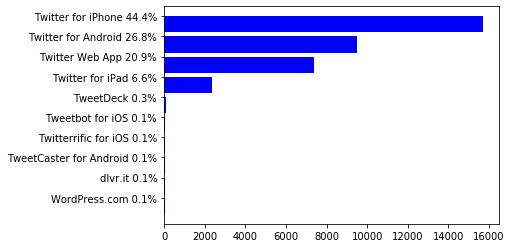

In [7]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
trump_dataset.source_name = trump_dataset.source.apply(get_source_name)

source_counts = trump_dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(trump_dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

de        15
tl        17
zh        23
in        31
ja        67
fr       103
pt       195
es       845
und     1194
en     32805
Name: lang, dtype: int64

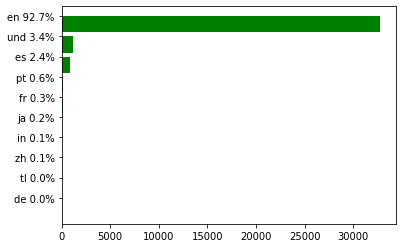

In [8]:
lang_counts = trump_dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(trump_dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [9]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from  textblob import TextBlob

In [10]:
trump_dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

trump_dataset1 = pd.DataFrame(trump_dataset1)

is_trump_dataset1=trump_dataset1.lang=="en"
trump_dataset1=trump_dataset1[is_trump_dataset1]
trump_dataset1

,id,text,lang
0,1323081382789349377,RT @RanttMedia: Authoritarians strive to make ...,en
1,1323081382734843904,RT @stevesilberman: As a historian who has wri...,en
2,1323081382881492992,RT @Qtah17: You can feel the energy Trump is h...,en
3,1323081382659346432,"RT @EM_RESUS: Hi ER Doc here,\n\nI can’t belie...",en
4,1323081382923440129,RT @sarahkendzior: If all the vacuous horserac...,en
...,...,...,...
35398,1323084670922379265,RT @JoshShapiroPA: FACT CHECK: Our elections a...,en
35399,1323084670817492992,RT @tinagutierrez04: #WithBidenWeCan be who we...,en
35400,1323084670884585472,RT @GregRubini: Trump car rally in San Diego:,en
35401,1323084670897135617,RT @bscorpiio: Where’s the tear gas?\nWhere’s ...,en


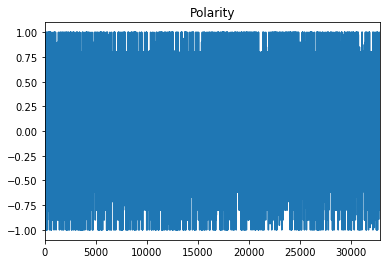

In [11]:
tweettext=trump_dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

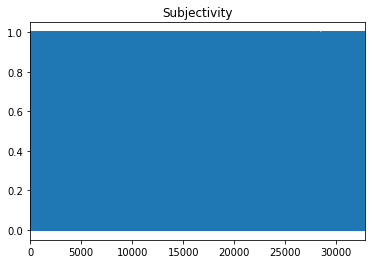

In [12]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [13]:
import statistics
statistics.mean(poltweet.polarity)

0.05849411431514639

In [14]:
import statistics
statistics.mean(poltweet.subjectivity)

0.36611690364033483

In [15]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [16]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = trump_dataset1['text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
nltk.download('stopwords')
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PornpatSamartlertdee\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


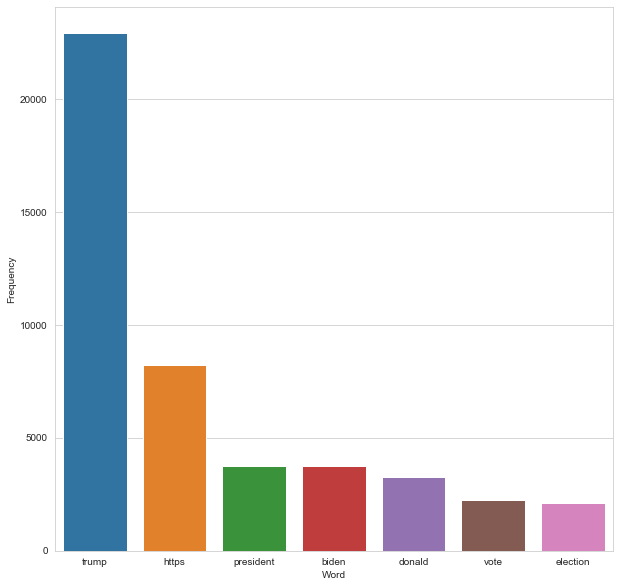

In [17]:
import seaborn as sns
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

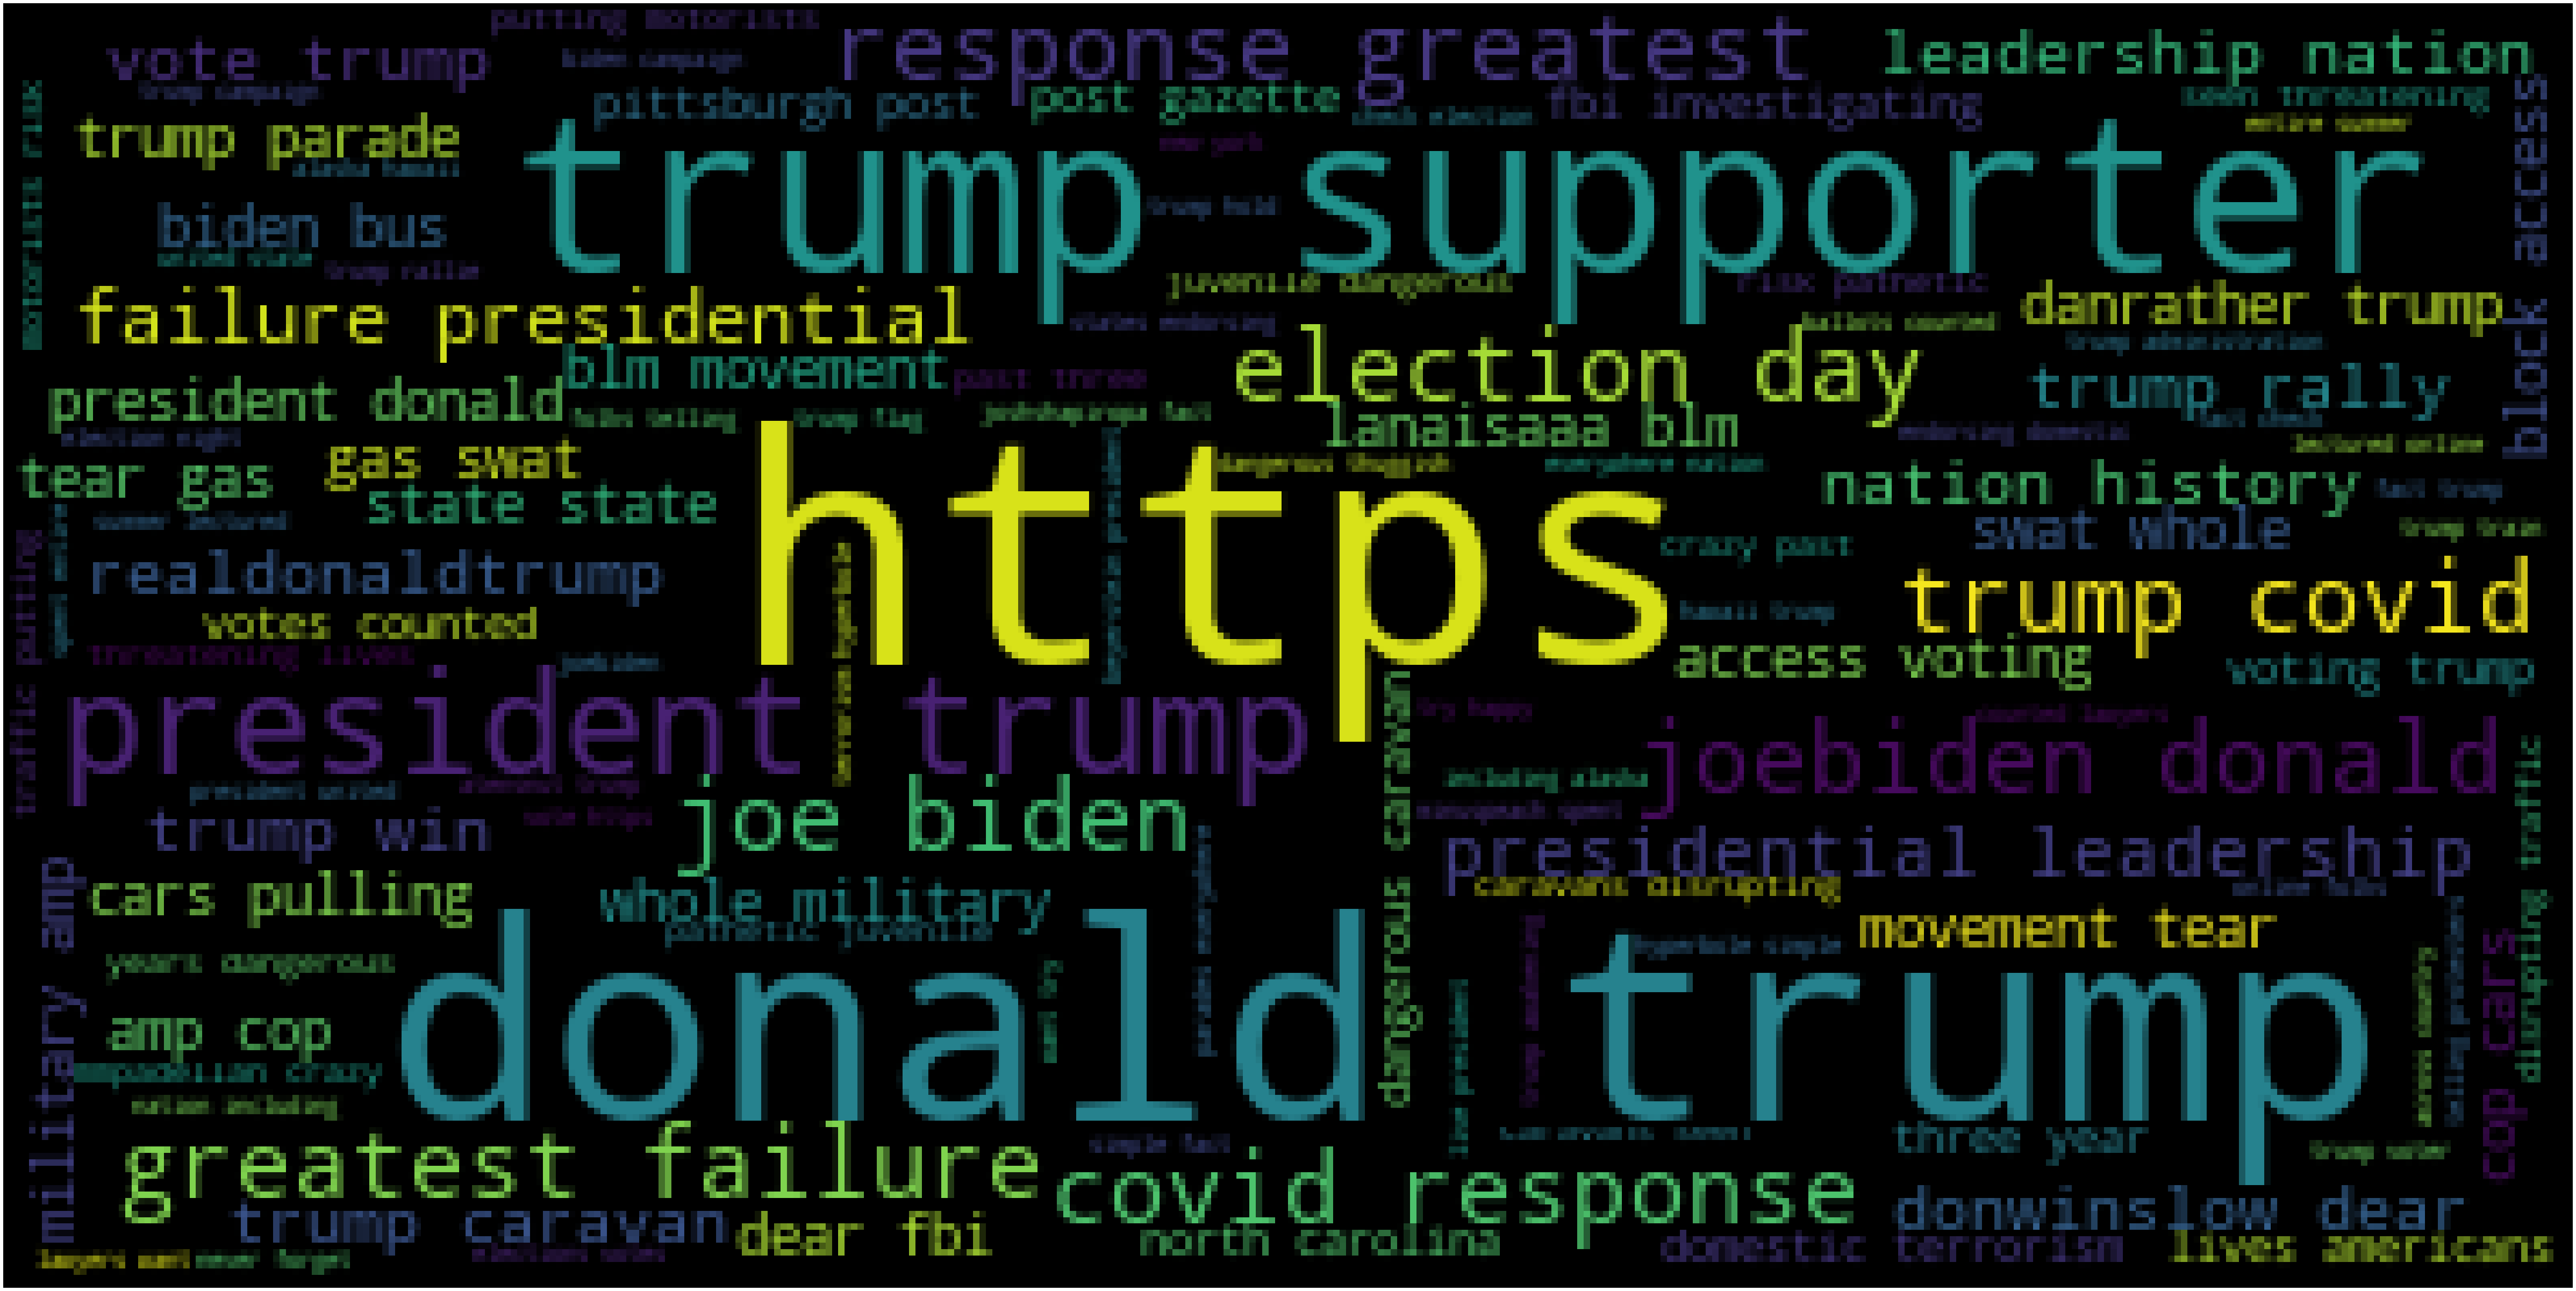

In [18]:
wc(cleaned_data_title,'black','Common Words' )

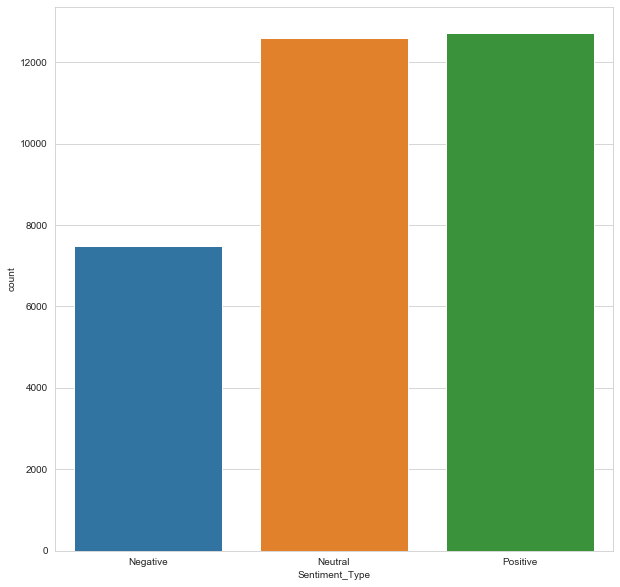

In [42]:
from textblob import TextBlob

bloblist_desc = list()

twit=trump_dataset1['text'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)

In [43]:
import collections, numpy as np
a=twit_polarity_desc.Sentiment_Type
neut=np.count_nonzero(a == 'Neutral')
pos=np.count_nonzero(a == 'Positive')
neg=np.count_nonzero(a == 'Negative')
popularity='{0:.2f}'.format((((neut*0.5)+(pos)+(neg*0))/(neut+pos+neg))*100)
popularity

'57.96'

In [ ]:
#Biden

In [20]:
col = pymongo.MongoClient()["DSA201"]["Biden"]
col.count()

C:\Users\PornpatSamartlertdee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


35000

In [21]:
col.find_one()

{'_id': ObjectId('5f9fce0fa0425328bff6b3e9'),
 'created_at': 'Mon Nov 02 09:14:53 +0000 2020',
 'id': 1323191840535957504,
 'id_str': '1323191840535957504',
 'text': 'RT @TimMurtaugh: Nothing exposes Biden’s disdain for the forgotten working men &amp; women of PA like campaigning with anti-fracking activist L…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 979826812871237634,
  'id_str': '979826812871237634',
  'name': 'Gertrude Lyles',
  'screen_name': 'Gertrude_Lyles',
  'location': 'Sunshine State',
  'url': None,
  'description': 'Retired Business Owner',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 168,
  'friends_count': 713,
  'listed_count': 0,
  'favourites_count': 47933,
  'st

In [22]:
biden_dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

biden_dataset = pd.DataFrame(biden_dataset)
#from googletrans import Translator
#translator=Translator()
#biden_dataset.text=translator.translate(dataset.text)
biden_dataset

,created_at,text,user,source,lang
0,Mon Nov 02 09:14:53 +0000 2020,RT @TimMurtaugh: Nothing exposes Biden’s disda...,@Gertrude_Lyles,"<a href=""http://twitter.com/download/android"" ...",en
1,Mon Nov 02 09:14:53 +0000 2020,"@DrGJackBrown SPOT ON👍🚩 GOP ""COWARDLY SILENCE""...",@Dominiq84085818,"<a href=""http://twitter.com/download/android"" ...",en
2,Mon Nov 02 09:14:53 +0000 2020,RT @zeusFanHouse: BREAKING: #Hunter #Biden's '...,@tom40yrs,"<a href=""http://twitter.com/download/android"" ...",en
3,Mon Nov 02 09:14:53 +0000 2020,RT @realDonaldTrump: Just learned that Sleepy ...,@tpel78,"<a href=""http://twitter.com/download/android"" ...",en
4,Mon Nov 02 09:14:53 +0000 2020,RT @kjsorrel: as a state with the second highe...,@badgirlcuban,"<a href=""http://twitter.com/download/iphone"" r...",en
...,...,...,...,...,...
34995,Mon Nov 02 09:56:36 +0000 2020,RT @R_del_Mar: Waking up and seeing the polls ...,@tliarch,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
34996,Mon Nov 02 09:56:36 +0000 2020,RT @kylegriffin1: FiveThirtyEight average two ...,@waldy93529582,"<a href=""http://twitter.com/download/iphone"" r...",en
34997,Mon Nov 02 09:56:36 +0000 2020,"Loranne Ausley and Alison Tant, both working m...",@Kiran47029843,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
34998,Mon Nov 02 09:56:37 +0000 2020,Joe Biden has made it clear that HE WILL NOT R...,@Garde2007,"<a href=""http://twitter.com/#!/download/ipad"" ...",en


In [23]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(biden_dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,24939
1,biden,24405
2,the,17878
3,https,11051
4,co,10751
5,is,9512
6,to,9474
7,joe,8647
8,in,8394
9,and,8324


C:\Users\PornpatSamartlertdee\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


Echobox                   17
IFTTT                     42
Tweetbot for iΟS          48
dlvr.it                   51
WordPress.com             98
TweetDeck                186
Twitter for iPad        1795
Twitter Web App         8577
Twitter for Android    11368
Twitter for iPhone     12419
Name: source, dtype: int64

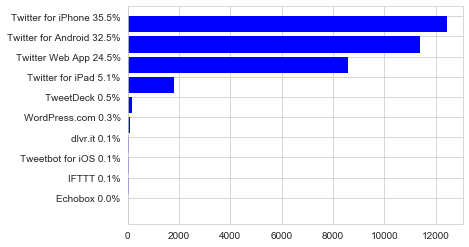

In [24]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
biden_dataset.source_name = biden_dataset.source.apply(get_source_name)

source_counts = biden_dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(biden_dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

nl       186
it       229
ja       296
tr       298
pt       331
de       384
fr       625
es      1103
und     1332
en     29540
Name: lang, dtype: int64

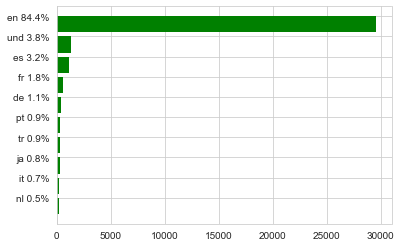

In [25]:
lang_counts = biden_dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(biden_dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [26]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from  textblob import TextBlob

In [29]:
biden_dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

biden_dataset1 = pd.DataFrame(biden_dataset1)

is_biden_dataset1=biden_dataset1.lang=="en"
biden_dataset1=biden_dataset1[is_biden_dataset1]
biden_dataset1

,id,text,lang
0,1323191840535957504,RT @TimMurtaugh: Nothing exposes Biden’s disda...,en
1,1323191840099733505,"@DrGJackBrown SPOT ON👍🚩 GOP ""COWARDLY SILENCE""...",en
2,1323191840661753859,RT @zeusFanHouse: BREAKING: #Hunter #Biden's '...,en
3,1323191840867274752,RT @realDonaldTrump: Just learned that Sleepy ...,en
4,1323191840720367616,RT @kjsorrel: as a state with the second highe...,en
...,...,...,...
34994,1323202341101662208,RT @CROWENATION2020: @DarenSorenson @kayleighm...,en
34995,1323202341290401794,RT @R_del_Mar: Waking up and seeing the polls ...,en
34996,1323202341860970496,RT @kylegriffin1: FiveThirtyEight average two ...,en
34997,1323202342406205442,"Loranne Ausley and Alison Tant, both working m...",en


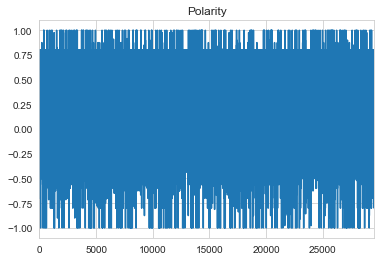

In [30]:
tweettext=biden_dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

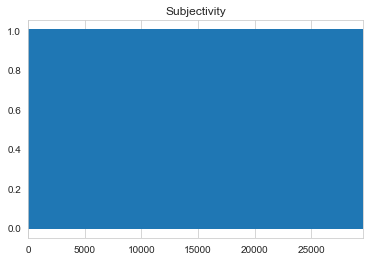

In [31]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [32]:
import statistics
statistics.mean(poltweet.polarity)

0.07241670348210595

In [33]:
import statistics
statistics.mean(poltweet.subjectivity)

0.3545014020625205

In [34]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [35]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = biden_dataset1['text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
nltk.download('stopwords')
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PornpatSamartlertdee\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


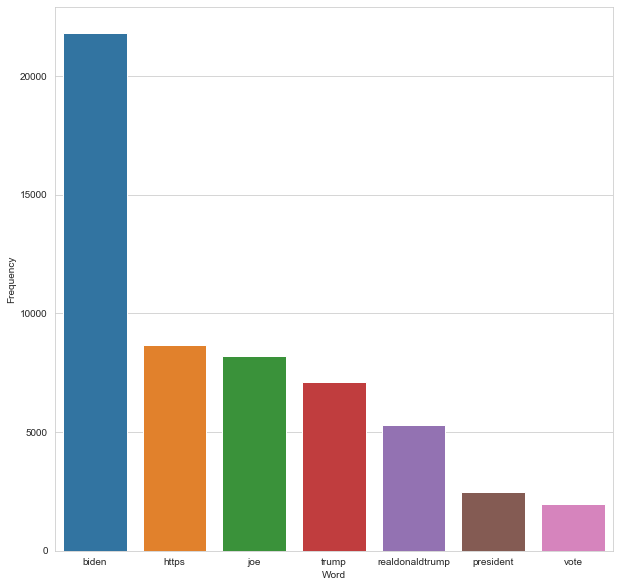

In [36]:
import seaborn as sns
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

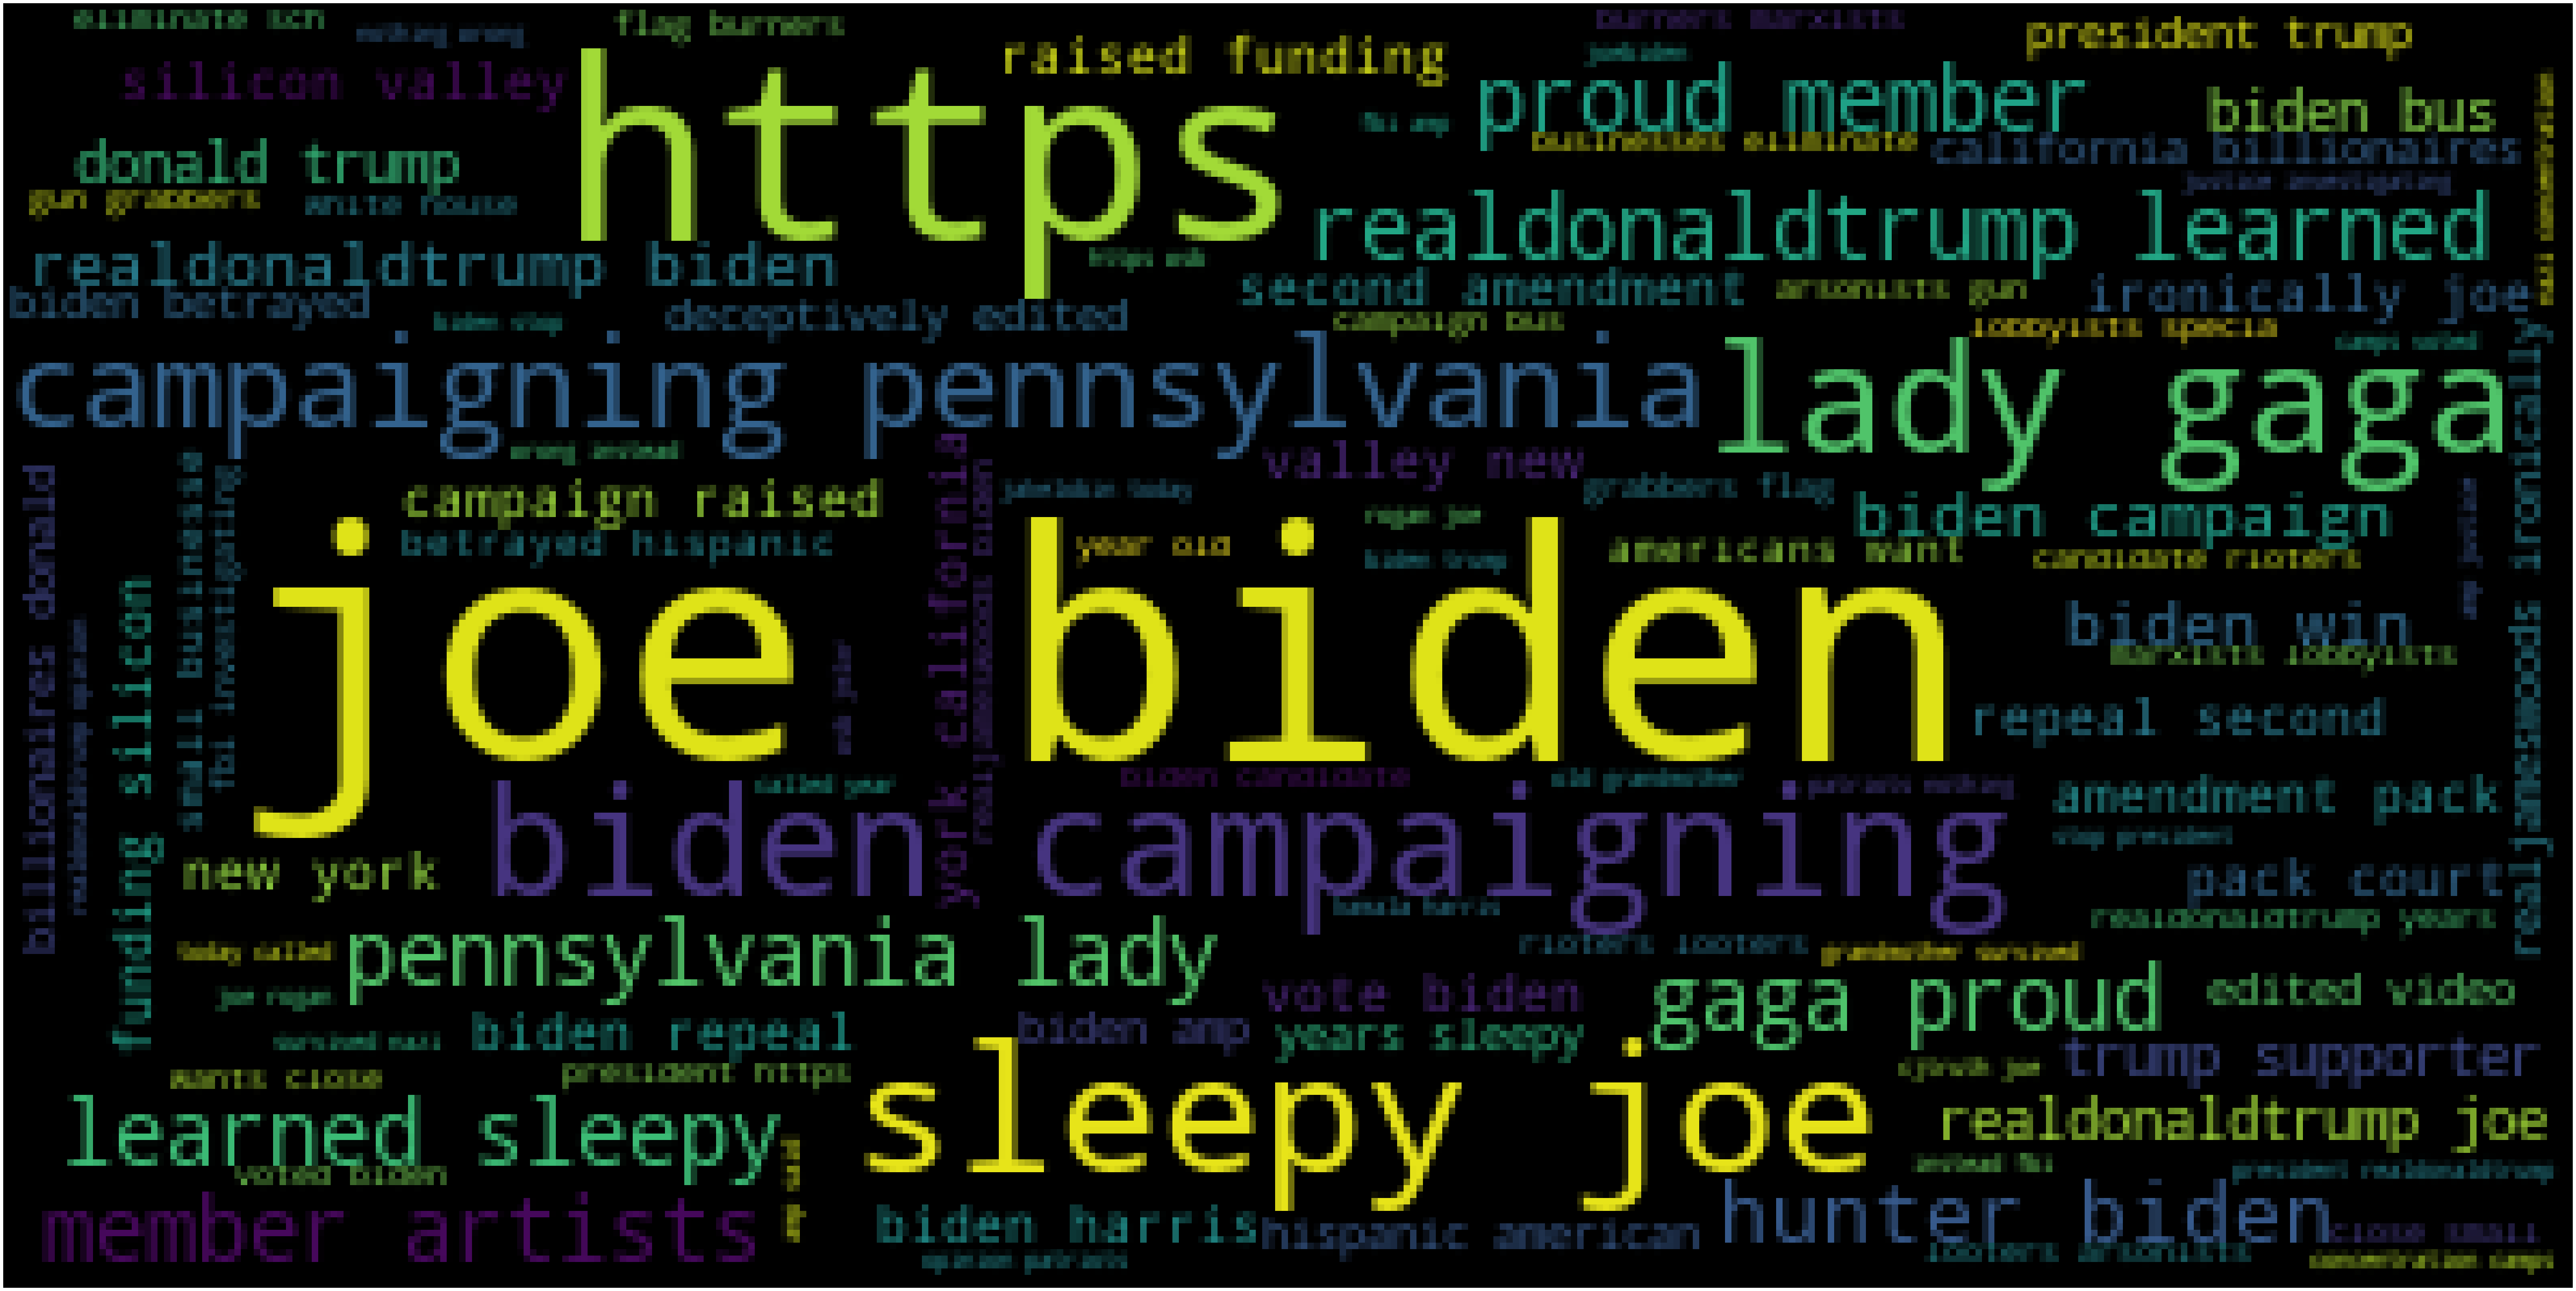

In [37]:
wc(cleaned_data_title,'black','Common Words' )

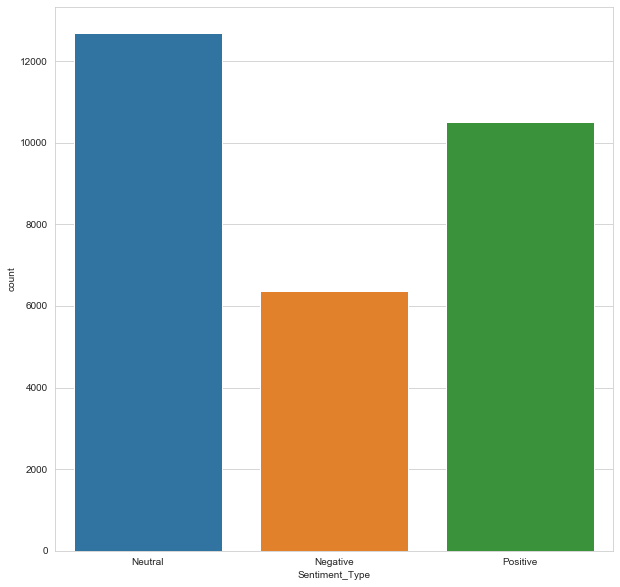

In [40]:
from textblob import TextBlob

bloblist_desc = list()

twit=biden_dataset1['text'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)

In [41]:
import collections, numpy as np
a=twit_polarity_desc.Sentiment_Type
neut=np.count_nonzero(a == 'Neutral')
pos=np.count_nonzero(a == 'Positive')
neg=np.count_nonzero(a == 'Negative')
popularity='{0:.2f}'.format((((neut*0.5)+(pos)+(neg*0))/(neut+pos+neg))*100)
popularity

'57.01'